In [1]:
#Support Vector Machines
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

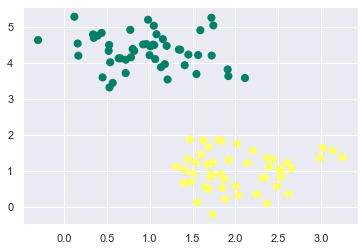

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.50)

plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'summer')

(-1.0, 3.5)

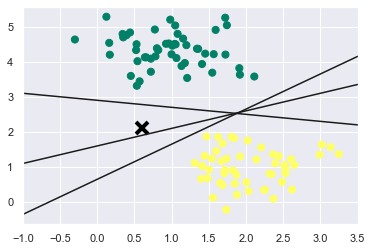

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'summer')
plt.plot([0.6], [2.1], 'x', color = 'black', markeredgewidth = 4, markersize=12)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5)

(-1.0, 3.5)

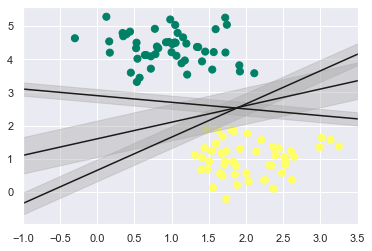

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'summer')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)
    
plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def decision_function(model, ax = None, plot_support = True):
    
    if ax is None:
        ax = plt.gca()

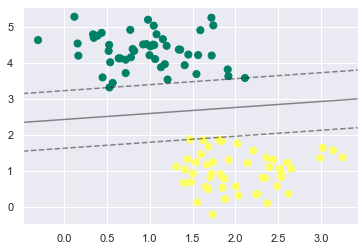

In [7]:
def decision_function(model, ax = None, plot_support = True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors = 'k', levels=[-1,0,1], alpha = 0.5, linestyles = ['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], s=300, linewidth = 1, facecolors = 'none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0], X[:, 1], c = y, s = 50, cmap = 'summer')
decision_function(model)


In [8]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [10]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('data/pima-indians-diabetes.csv', header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose','bp', 'pedigree']
X = pima[feature_cols]
y= pima.label #hedef değişken

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[111  35]
 [ 42  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       146
           1       0.55      0.51      0.53        85

    accuracy                           0.67       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.66      0.67      0.66       231

Accuracy: 0.6666666666666666


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data/Social_Network_Ads.csv')

In [23]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[55  8]
 [ 9 28]]


In [27]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


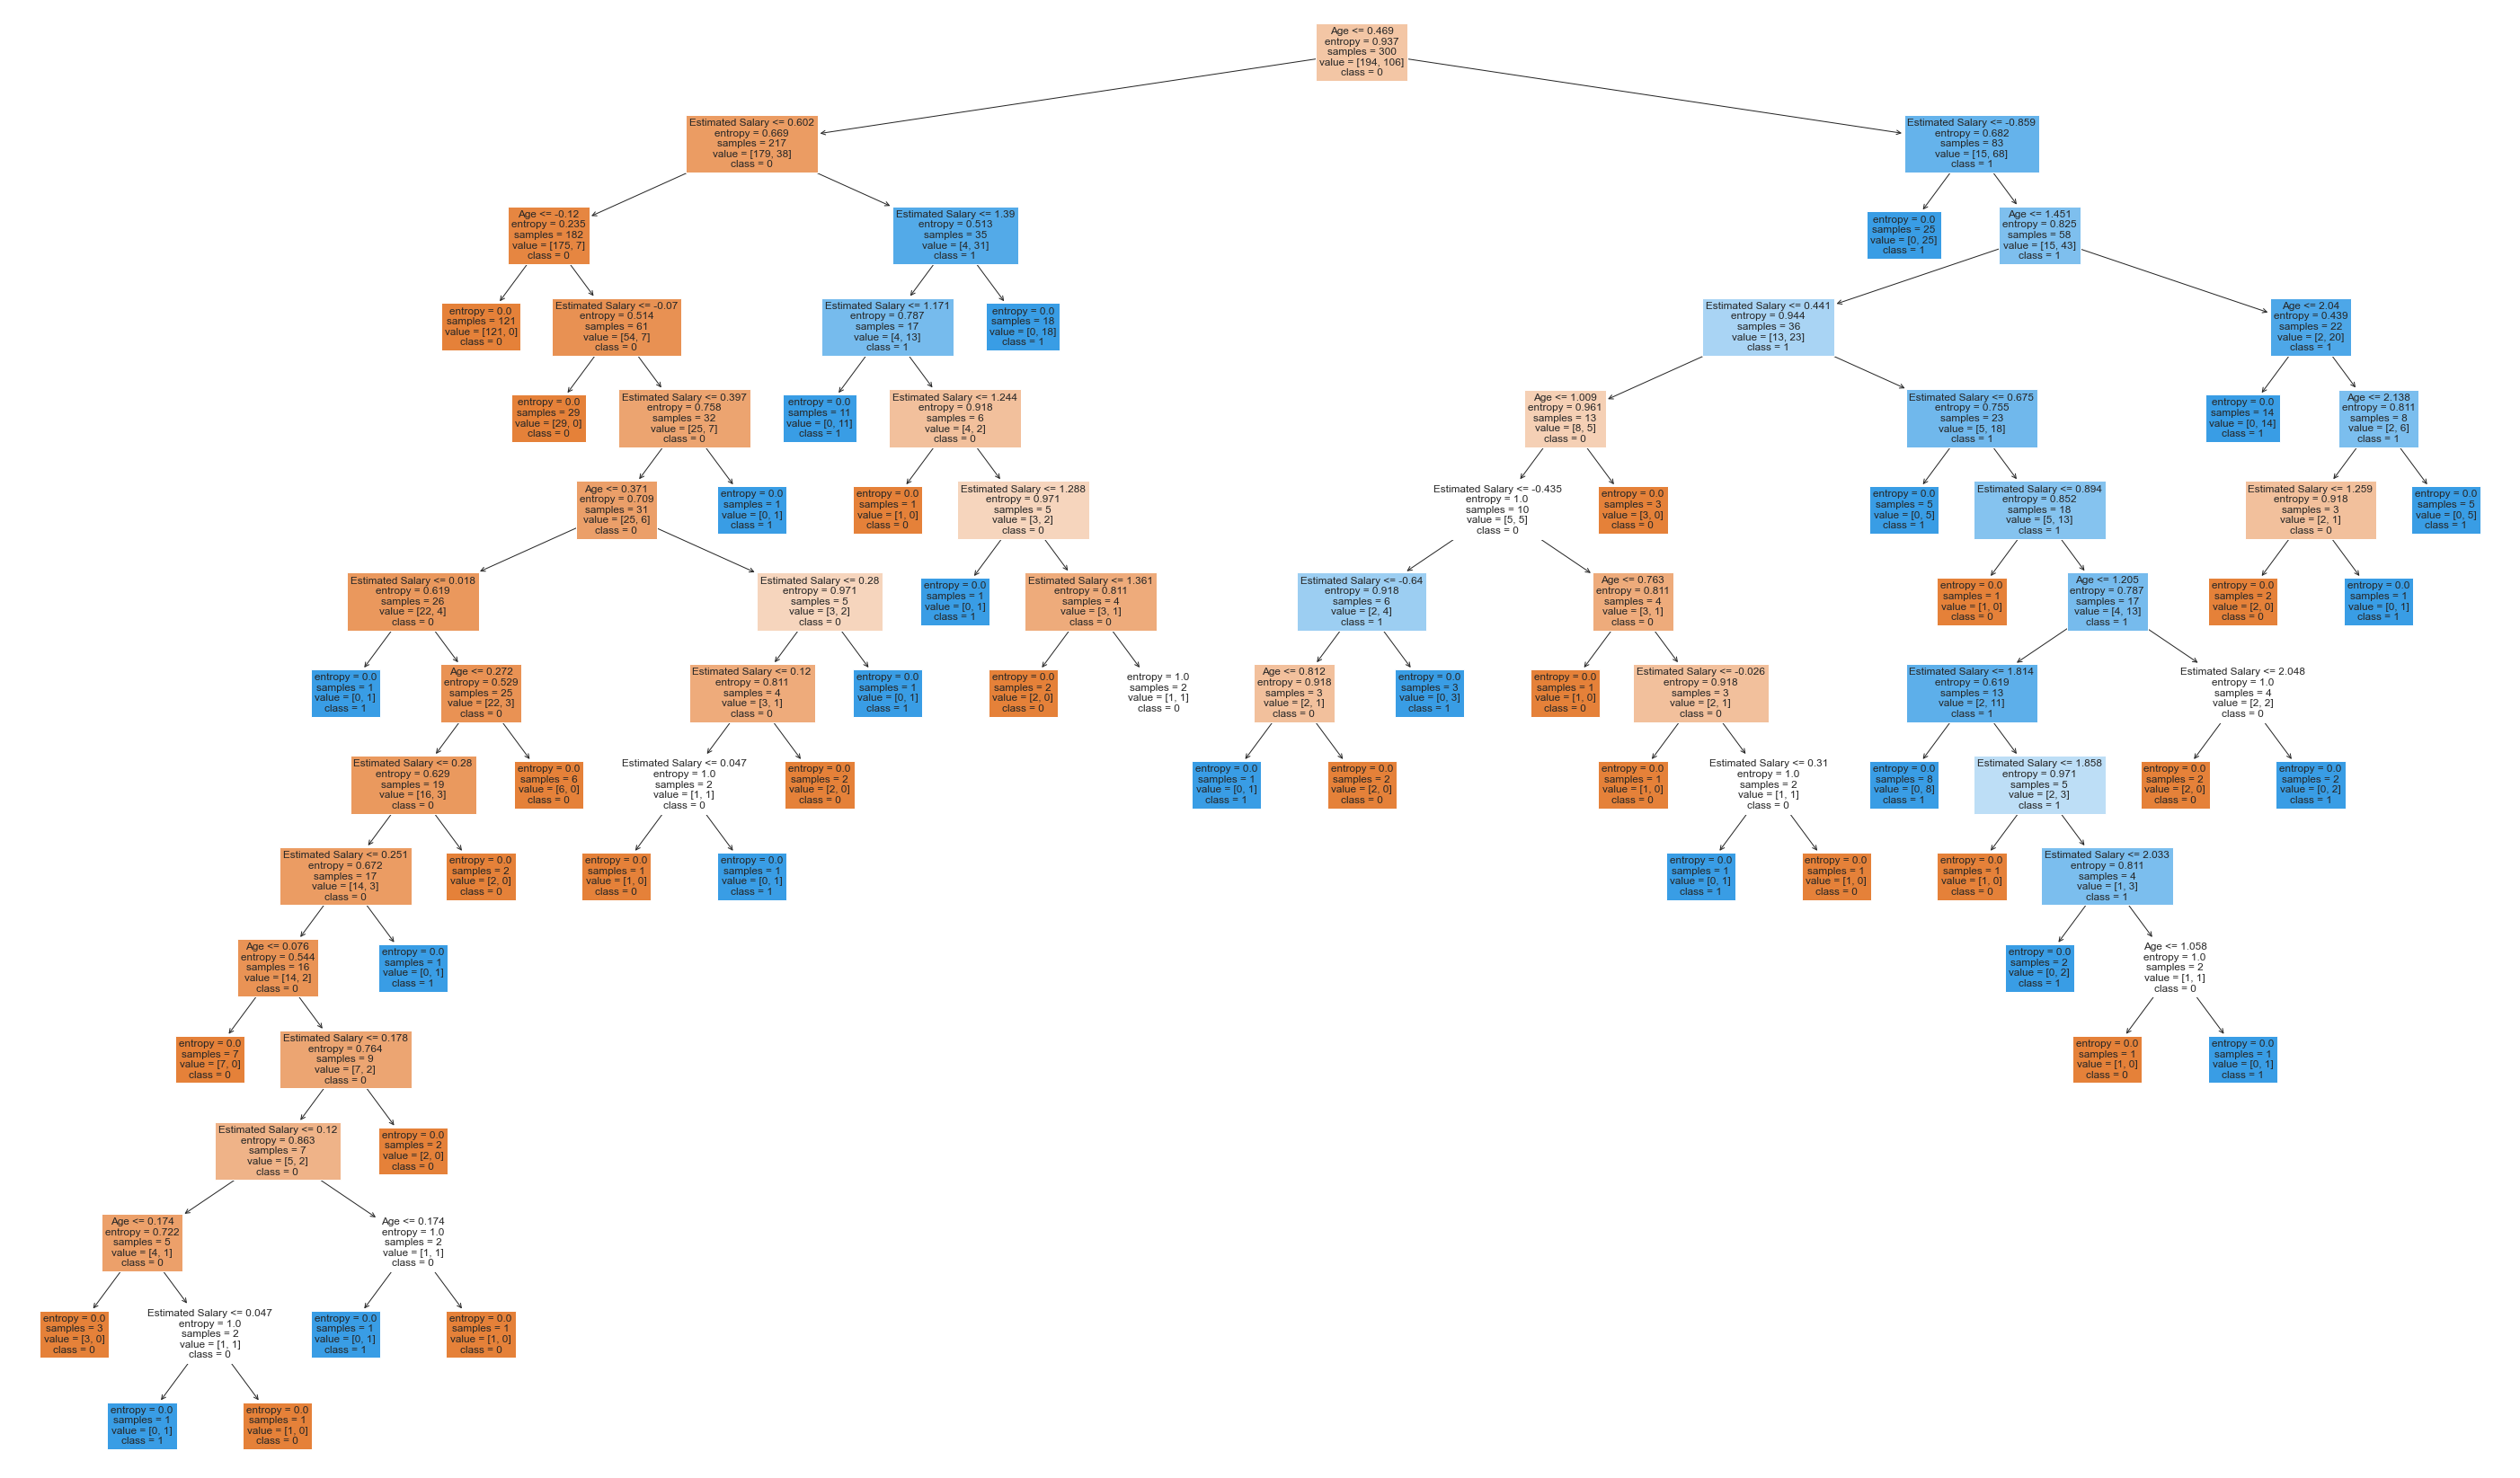

In [28]:
from sklearn import tree
fn = ['Age', 'Estimated Salary']
cn = ['0', '1']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(50,30))
tree.plot_tree(classifier, feature_names = fn, class_names=cn, filled = True)
fig.savefig('image.png')

In [29]:
#random forest algortiması / sınıflandırma algoritması
'''
1- verilen verisetindeki rastgele örnekleri seçeceğiz
2- her örnek için bir karar ağacı (decision tree) oluşturacağız. her ağaç için bir tahmin sonucu olacak.
3- her tahmin edilen sonuç için bir oylama (voting) gerçekleştirilecek. 
4- en çok oylanan tahmin sonucu seçilir ve final tahmini olarak belirlenir.
'''


'\n1- verilen verisetindeki rastgele örnekleri seçeceğiz\n2- her örnek için bir karar ağacı (decision tree) oluşturacağız. her ağaç için bir tahmin sonucu olacak.\n3- her tahmin edilen sonuç için bir oylama (voting) gerçekleştirilecek. \n4- en çok oylanan tahmin sonucu seçilir ve final tahmini olarak belirlenir.\n'

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] 

In [56]:
dataset = pd.read_csv('data/Iris.csv', names = headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[14  0  0]
 [ 0 19  0]
 [ 0  2 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      1.00      0.95        19
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.96        45
      macro avg       0.97      0.94      0.95        45
   weighted avg       0.96      0.96      0.95        45

Accuracy: 0.9555555555555556


In [ ]:
#K-means algoritması bir clustering (kümeleme) algoritmasıdır
"""
1- küme adedi belirlenir
2- K adet veri noktasının her biri bir kümeye atanır. 
3- centroid adı verilen küme merkezleri oluşturulur.
4- optimal centroid bulunmaya çalışılır. uzaklık hesabına göre ilgili atamalar gerçekleştirilir. 

"""

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [66]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)


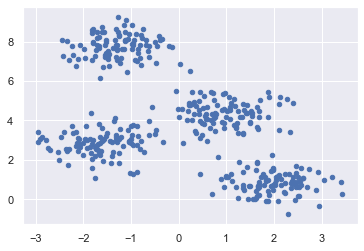

In [67]:
plt.scatter(X[:,0],X[:,1], s = 20)
plt.show()

In [69]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

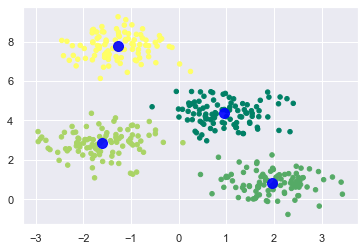

In [70]:
plt.scatter(X[:,0], X[:,1], c = y_kmeans, s = 20, cmap = 'summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c = 'blue', s = 100, alpha = 0.9)
plt.show()

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [78]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape #verisetimizde 64 özellikli (feature) 1797 adet örnek var. 

(1797, 64)

In [79]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

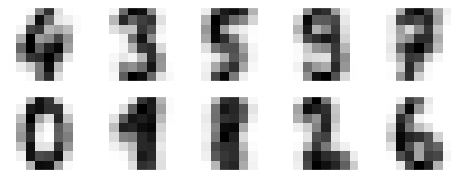

In [82]:
fig, ax = plt.subplots(2, 5, figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

In [83]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

headernames = ['preg','plas','pres','skin','test','mass','pedi','age','class']
data = pd.read_csv('data/pima-indians-diabetes.csv', names = headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]
data.shape

(768, 9)

In [95]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


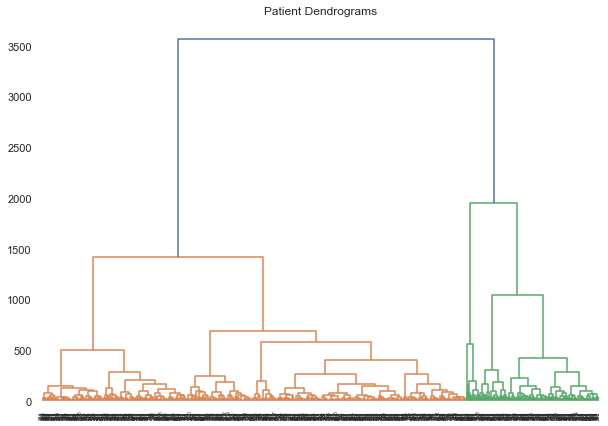

In [96]:
patient_data = data.iloc[:,3:5].values
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Patient Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))


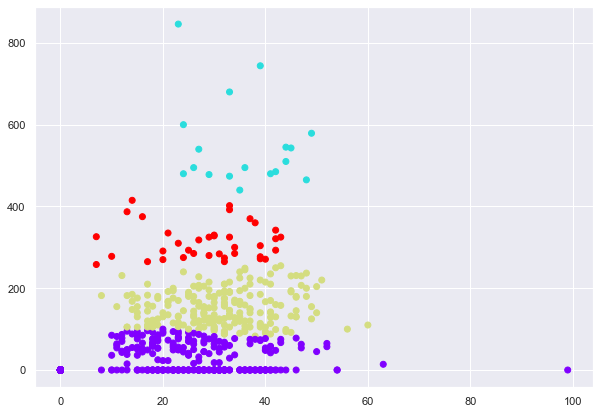

In [97]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(patient_data)
plt.figure(figsize=(10,7))
plt.scatter(patient_data[:,0], patient_data[:,1], c = cluster.labels_, cmap = 'rainbow')

In [98]:
'''
Cartpole Problemi - Reinforcement Learning (Pekiştirmeli Öğrenme)
Cartpole, ters sarkaç demektir. 


'''

'\nCartpole Problemi - Reinforcement Learning (Pekiştirmeli Öğrenme)\nCartpole, ters sarkaç demektir. \n\n\n'

In [99]:
import gym

env = gym.make('CartPole-v0')
for _ in range(20):
    observation = env.reset()
    for i in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(i+1))
            break;

[0.01474355 0.04339308 0.02920432 0.02385161]
[ 0.01561142  0.23808431  0.02968135 -0.25947585]
[ 0.0203731   0.43277024  0.02449183 -0.54265108]
[ 0.02902851  0.62753957  0.01363881 -0.82751758]
[ 0.0415793   0.43223381 -0.00291154 -0.5305765 ]
[ 0.05022397  0.6273966  -0.01352307 -0.82417543]
[ 0.06277191  0.82270089 -0.03000658 -1.12108075]
[ 0.07922592  0.62798506 -0.05242819 -0.83795909]
[ 0.09178563  0.43361678 -0.06918737 -0.56221411]
[ 0.10045796  0.23953047 -0.08043166 -0.29210603]
[ 0.10524857  0.04564195 -0.08627378 -0.0258349 ]
[ 0.10616141 -0.14814362 -0.08679048  0.23842931]
[ 0.10319854  0.04810409 -0.08202189 -0.08031865]
[ 0.10416062 -0.14575211 -0.08362826  0.18540067]
[ 0.10124558  0.05046063 -0.07992025 -0.13244792]
[ 0.10225479 -0.14343096 -0.08256921  0.13398959]
[ 0.09938617 -0.33727909 -0.07988941  0.39952338]
[ 0.09264059 -0.14112011 -0.07189895  0.08276087]
[ 0.08981819 -0.3351417  -0.07024373  0.35192124]
[ 0.08311535 -0.52919809 -0.06320531  0.62165332]
[ 0.